In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [94]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [95]:
all_matches = matches[(matches['team1'].isin(['Rajasthan Royals', 'Sunrisers Hyderabad'])) & (matches['team2'].isin(['Rajasthan Royals', 'Sunrisers Hyderabad']))]

In [96]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [97]:
sub_data = data[(data['team1'].isin(['Rajasthan Royals', 'Sunrisers Hyderabad'])) & (data['team2'].isin(['Rajasthan Royals', 'Sunrisers Hyderabad']))]

### Who will win the match?

In [98]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
415,416,2013,Jaipur,4/27/2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,8,JP Faulkner,Sawai Mansingh Stadium,VA Kulkarni,K Srinath,NaN
448,449,2013,Hyderabad,5/17/2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,23,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,AK Chaudhary,NaN
454,455,2013,Delhi,5/22/2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
460,461,2014,Abu Dhabi,4/18/2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
486,487,2014,Ahmedabad,5/8/2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,32,0,B Kumar,"Sardar Patel Stadium, Motera",AK Chaudhary,NJ Llong,NaN


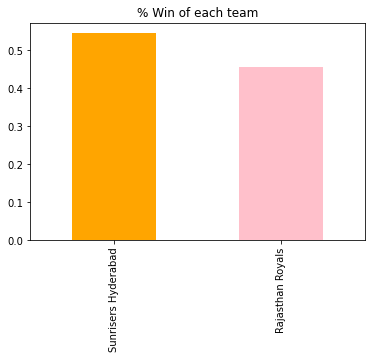

In [99]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title="% Win of each team", color = ['Orange', 'Pink'])

In [100]:
all_matches.groupby('venue')['winner'].value_counts()

venue                                                winner             
Brabourne Stadium                                    Sunrisers Hyderabad    1
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium  Rajasthan Royals       1
Feroz Shah Kotla                                     Rajasthan Royals       1
Rajiv Gandhi International Stadium, Uppal            Sunrisers Hyderabad    2
Rajiv Gandhi Intl. Cricket Stadium                   Sunrisers Hyderabad    1
Sardar Patel Stadium, Motera                         Sunrisers Hyderabad    1
Sawai Mansingh Stadium                               Rajasthan Royals       2
                                                     Sunrisers Hyderabad    1
Sheikh Zayed Stadium                                 Rajasthan Royals       1
Name: winner, dtype: int64

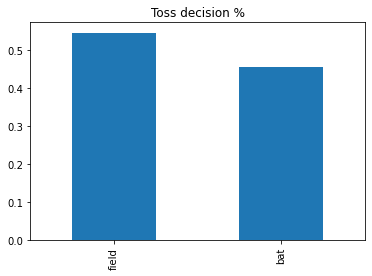

In [101]:
all_matches['toss_decision'].value_counts(normalize=True).plot.bar(title='Toss decision %')

In [102]:
all_matches.groupby('toss_winner')['toss_decision'].value_counts()

toss_winner          toss_decision
Rajasthan Royals     field            5
                     bat              1
Sunrisers Hyderabad  bat              4
                     field            1
Name: toss_decision, dtype: int64

* It is clearly visible that RR liked to bat first and chase the target and this because they have that batting power house who can chase any target.
* SRH likes to bat first and put pressure on the opponent team.

In [103]:
all_matches.groupby(['toss_decision', 'toss_winner'])['winner'].value_counts(normalize=True)

toss_decision  toss_winner          winner             
bat            Rajasthan Royals     Sunrisers Hyderabad    1.0
               Sunrisers Hyderabad  Rajasthan Royals       0.5
                                    Sunrisers Hyderabad    0.5
field          Rajasthan Royals     Rajasthan Royals       0.6
                                    Sunrisers Hyderabad    0.4
               Sunrisers Hyderabad  Sunrisers Hyderabad    1.0
Name: winner, dtype: float64

In [104]:
sub_data.groupby(['venue','winner'])['win_by_runs', 'win_by_wickets'].agg({'max'})

win_by_runs  \
                                                                               max   
venue                                              winner                            
Brabourne Stadium                                  Sunrisers Hyderabad           7   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta... Rajasthan Royals              0   
Feroz Shah Kotla                                   Rajasthan Royals              0   
Rajiv Gandhi International Stadium, Uppal          Sunrisers Hyderabad          23   
Rajiv Gandhi Intl. Cricket Stadium                 Sunrisers Hyderabad           0   
Sardar Patel Stadium, Motera                       Sunrisers Hyderabad          32   
Sawai Mansingh Stadium                             Rajasthan Royals              0   
                                                   Sunrisers Hyderabad          11   
Sheikh Zayed Stadium                               Rajasthan Royals              0   

                                                                       win_by_wickets  
                                                                                  max  
venue                                              winner                              
Brabourne Stadium                                  Sunrisers Hyderabad              0  
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta... Rajasthan Royals                 6  
Feroz Shah Kotla                                   Rajasthan Royals                 4  
Rajiv Gandhi International Stadium, Uppal          Sunrisers Hyderabad              9  
Rajiv Gandhi Intl. Cricket Stadium                 Sunrisers Hyderabad              5  
Sardar Patel Stadium, Motera                       Sunrisers Hyderabad              0  
Sawai Mansingh Stadium                             Rajasthan Royals                 8  
                                                   Sunrisers Hyderabad              0  
Sheikh Zayed Stadium                               Rajasthan Royals                 4

From the above analysis it can be said that SRH have an edge over RR when it comes to chasing and defending. But, at the same time we also need to consider the current stats to better understand the patterns.

In [105]:
all_matches.groupby('winner')['player_of_match'].value_counts()

winner               player_of_match
Rajasthan Royals     AM Rahane          2
                     BJ Hodge           1
                     JD Unadkat         1
                     JP Faulkner        1
Sunrisers Hyderabad  A Mishra           1
                     B Kumar            1
                     EJG Morgan         1
                     KS Williamson      1
                     Rashid Khan        1
                     S Dhawan           1
Name: player_of_match, dtype: int64

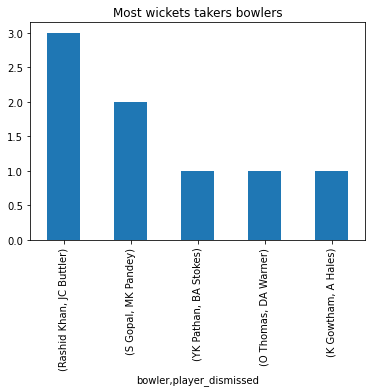

In [106]:
sub_data[sub_data['season']>2015].groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending=False).head().plot.bar(title='Most wickets takers bowlers')

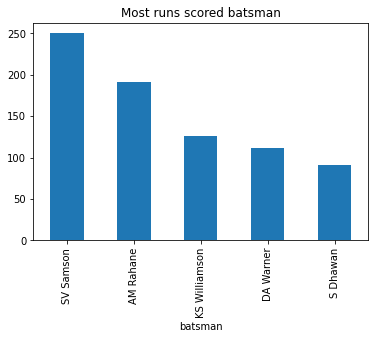

In [107]:
sub_data[sub_data['season']>2015].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head().plot.bar(title='Most runs scored batsman')

In [108]:
sub_data[sub_data['batsman'] == 'SV Samson'].groupby(['match_id', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(3)

match_id  batsman  
11144     SV Samson    106
11336     SV Samson     53
7897      SV Samson     51
Name: batsman_runs, dtype: int64

In [109]:
sub_data[sub_data['bowler'] == 'Rashid Khan'].groupby(['match_id', 'bowler'])['player_dismissed'].value_counts().sort_values(ascending=False).head(3)

match_id  bowler       player_dismissed
11336     Rashid Khan  L Livingstone       1
11144     Rashid Khan  JC Buttler          1
7921      Rashid Khan  JC Buttler          1
Name: player_dismissed, dtype: int64

### How many balls will Rashid Khan take to get his first wicket?

In [120]:
def Check(df):
    
    l = []
    count = 1
    for i in df.player_dismissed_bool:
        if i == 0:
            count += 1
        else:
            l.append(count)
            break
    return sum(l)

In [121]:
sub_data[sub_data['bowler']=='Rashid Khan'].groupby('match_id').apply(Check)

match_id
7897     20
7921     12
11144     2
11336    13
dtype: int64

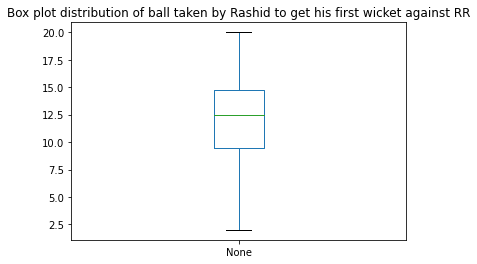

In [138]:
sub_data[sub_data['bowler']=='Rashid Khan'].groupby('match_id').apply(Check).plot.box(title='Box plot distribution of ball taken by Rashid to get his first wicket against RR')

In [131]:
print("Average balls that Rashid Khan take to get his first wicket against RR is : {}".format(round(sub_data[sub_data['bowler']=='Rashid Khan'].groupby('match_id').apply(Check).mean())))

Average balls that Rashid Khan take to get his first wicket against RR is : 12


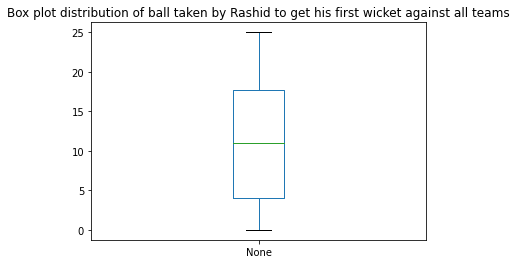

In [140]:
data[data['bowler']=='Rashid Khan'].groupby('match_id').apply(Check).plot.box(title='Box plot distribution of ball taken by Rashid to get his first wicket against all teams')

In [141]:
print("Average balls that Rashid Khan take to get his first wicket against all teams is : {}".format(round(data[data['bowler'] =='Rashid Khan'].groupby('match_id').apply(Check).mean())))

Average balls that Rashid Khan take to get his first wicket against all teams is : 10


In [144]:
data[data['bowler'] == 'Rashid Khan'].groupby(['batting_team', 'match_id']).apply(Check)

batting_team                 match_id
Chennai Super Kings          7913         1
                             7939         0
                             7950         4
                             7953         0
                             11324       13
                             11332       13
Delhi Capitals               21           0
                             39           0
                             7929         7
                             7935        18
                             11152       19
                             11321       24
                             11413       20
Gujarat Lions                6            5
                             52          11
Kings XI Punjab              19          11
                             32          19
                             7909        11
                             7918         5
                             11313        1
                             11339       10
Kolkata Knight Riders        14       

In [212]:
sub_data[sub_data['bowler'] == 'Rashid Khan'].groupby('match_id')['player_dismissed'].value_counts()

match_id  player_dismissed
7897      JC Buttler          1
7921      JC Buttler          1
11144     JC Buttler          1
11336     L Livingstone       1
Name: player_dismissed, dtype: int64

### How will David Warner get out?

In [146]:
sub_data2 = data[data['batsman'] == 'DA Warner']

In [147]:
sub_data3 = sub_data[sub_data['batsman'] == 'DA Warner']

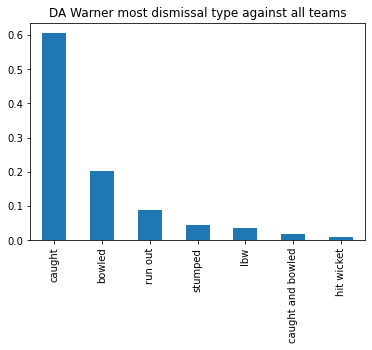

In [155]:
sub_data2['dismissal_kind'].value_counts(normalize=True).plot.bar(title='DA Warner most dismissal type against all teams')

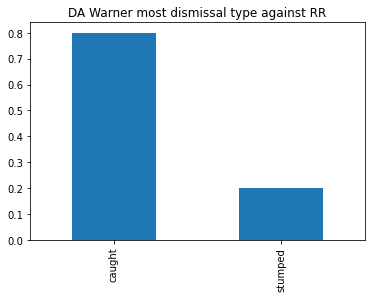

In [156]:
sub_data3['dismissal_kind'].value_counts(normalize=True).plot.bar(title='DA Warner most dismissal type against RR')

In [162]:
sub_data2.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending=False).head(10)

bowler           player_dismissed
Harbhajan Singh  DA Warner           4
L Balaji         DA Warner           3
UT Yadav         DA Warner           3
Sandeep Sharma   DA Warner           3
P Kumar          DA Warner           3
BW Hilfenhaus    DA Warner           3
Z Khan           DA Warner           2
BA Stokes        DA Warner           2
Kuldeep Yadav    DA Warner           2
M Morkel         DA Warner           2
Name: player_dismissed, dtype: int64

In [163]:
sub_data3.groupby('bowler')['player_dismissed'].value_counts()

bowler     player_dismissed
BA Stokes  DA Warner           1
O Thomas   DA Warner           1
PV Tambe   DA Warner           1
R Bhatia   DA Warner           1
SR Watson  DA Warner           1
Name: player_dismissed, dtype: int64

In [ ]:
It seems like DA Warner got out 

### Who will score  most runs for RR in the match?

In [176]:
sub_data4 = data[(data['batting_team'] == 'Rajasthan Royals') & (data['season']>2015)]

In [177]:
sub_data5 = sub_data[(sub_data['batting_team'] == 'Rajasthan Royals') & (sub_data['season']>2015)]

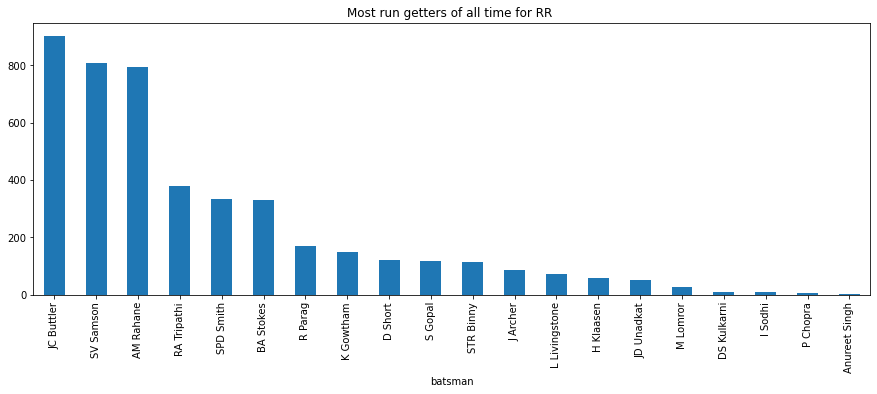

In [179]:
sub_data4.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(20).plot.bar(title="Most run getters of all time for RR ", figsize=(15,5))

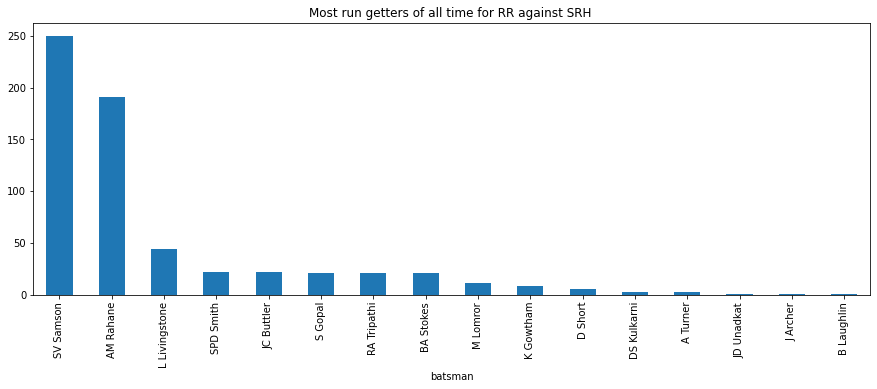

In [180]:
sub_data5.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(20).plot.bar(title="Most run getters of all time for RR against SRH ", figsize=(15,5))

In [182]:
sub_data5[sub_data5['batsman'].isin(['JC Buttler', 'SV Samson'])].groupby('bowler')['player_dismissed'].value_counts()

bowler           player_dismissed
Rashid Khan      JC Buttler          3
S Kaul           SV Samson           1
Shakib Al Hasan  SV Samson           1
Name: player_dismissed, dtype: int64

In [188]:
round((sub_data5[sub_data5['batsman'].isin(['JC Buttler', 'SV Samson'])].groupby(['batsman', 'bowler'])['batsman_runs'].sum()/sub_data5[sub_data5['batsman'].isin(['JC Buttler', 'SV Samson'])].groupby(['batsman', 'bowler'])['ball'].count())*100,2)

batsman     bowler         
JC Buttler  B Kumar             88.89
            Rashid Khan         37.50
            S Kaul              50.00
            Shakib Al Hasan     83.33
            YK Pathan          125.00
SV Samson   B Kumar            250.00
            B Stanlake         120.00
            Basil Thampi       283.33
            K Ahmed            185.71
            Rashid Khan         96.15
            S Kaul             152.38
            S Nadeem           177.78
            S Sharma           170.00
            Sandeep Sharma      37.50
            Shakib Al Hasan    128.57
            V Shankar          166.67
dtype: float64

In [195]:
sub_data6 = data[(data['bowler'].isin(['T Natarajan', 'V Shankar', 'Sandeep Sharma', 'Basil Thampi', 'K Ahmed', 'S Nadeem'])) & data['batsman'].isin(['JC Buttler', 'SV Samson'])]

In [210]:
sub_data6.groupby(['batsman', 'bowler'])['player_dismissed'].value_counts()

batsman    bowler          player_dismissed
SV Samson  S Nadeem        SV Samson           2
           Sandeep Sharma  SV Samson           2
Name: player_dismissed, dtype: int64

In [196]:
(sub_data6.groupby(['batsman', 'bowler'])['batsman_runs'].sum()/sub_data6.groupby(['batsman', 'bowler'])['ball'].count())*100

batsman     bowler        
JC Buttler  Basil Thampi      200.000000
            S Nadeem          260.000000
            Sandeep Sharma    216.666667
SV Samson   Basil Thampi      250.000000
            K Ahmed           185.714286
            S Nadeem          165.517241
            Sandeep Sharma     63.888889
            T Natarajan         0.000000
            V Shankar         166.666667
dtype: float64

### How many no-balls will be bowled in the match?

In [199]:
sub_data7 = sub_data[sub_data['noball_runs']!=0]

In [204]:
sub_data7.groupby('bowling_team')['noball_runs'].count().mean()

1.5

In [201]:
sub_data7.groupby('bowler')['noball_runs'].count()

bowler
B Laughlin     1
JP Faulkner    1
S Kaul         1
Name: noball_runs, dtype: int64

In [208]:
sub_data8 = data[(data['bowler'].isin(['T Natarajan', 'V Shankar', 'Sandeep Sharma', 'Basil Thampi', 'K Ahmed', 'S Nadeem'])) & (data['noball_runs']!=0)]

In [209]:
sub_data8.groupby(['match_id', 'bowler'])['noball_runs'].count()

match_id  bowler        
46        Sandeep Sharma    1
429       Sandeep Sharma    1
450       Sandeep Sharma    1
459       S Nadeem          1
496       Sandeep Sharma    3
557       Sandeep Sharma    1
7923      V Shankar         1
11342     Basil Thampi      1
Name: noball_runs, dtype: int64